In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
ticker = "BBNI.JK"  # Replace with the stock ticker you want to analyze
start_date = "2025-01-01"
end_date = "2025-03-19"

data = yf.download(ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


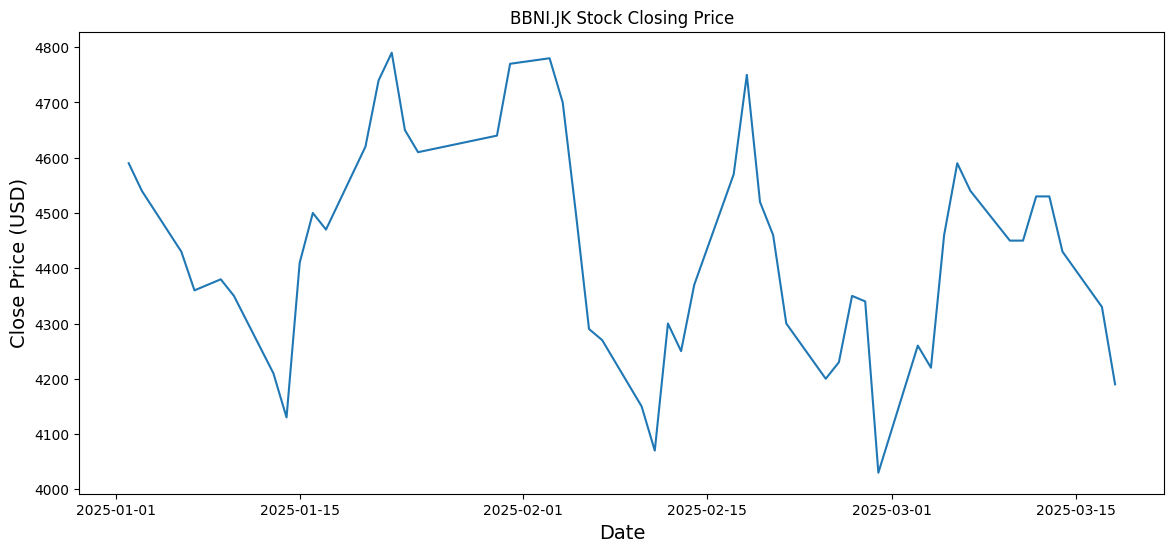

In [3]:
plt.figure(figsize=(14, 6))
plt.title(f"{ticker} Stock Closing Price")
plt.plot(data.index, data["Close"])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)
plt.show()

In [4]:
data["Close"]

Ticker,BBNI.JK
Date,
2025-01-02,4590.0
2025-01-03,4540.0
2025-01-06,4430.0
2025-01-07,4360.0
2025-01-08,4370.0
2025-01-09,4380.0
2025-01-10,4350.0
2025-01-13,4210.0
2025-01-14,4130.0


In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

# Set the lookback period and split the data into training and testing sets
lookback = 60
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - lookback:]

# Create a function to create a dataset with lookback period
def create_dataset(data, lookback):
    x = []
    y = []
    for i in range(lookback, len(data)):
        x.append(data[i - lookback:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

x_train, y_train = create_dataset(train_data, lookback)
x_test, y_test = create_dataset(test_data, lookback)

# Reshape the data to feed into the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=32, callbacks=[early_stopping])

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0697 - val_loss: 0.0033
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0033 - val_loss: 0.0045
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 12/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


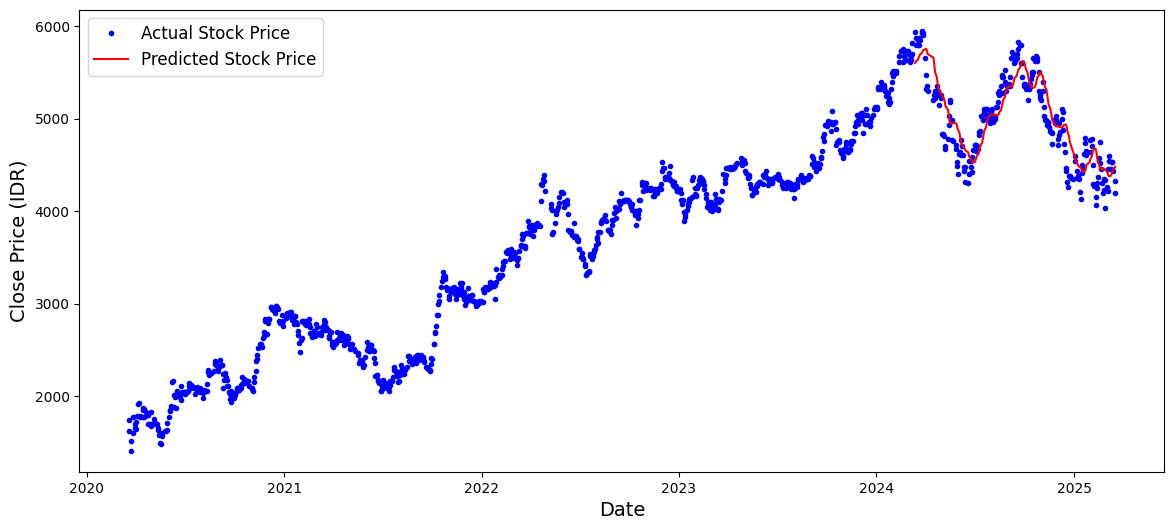

In [7]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(14, 6))
plt.plot(data.index, data["Close"], color='blue', ls='none', marker='o', markersize=3, label="Actual Stock Price")
plt.plot(data.index[len(y_train) + lookback:], predictions, 'r-', label="Predicted Stock Price")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (IDR)", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()


In [8]:
# Calculate the differences between consecutive predicted stock prices
differences = np.diff(predictions.reshape(-1))

# Count the number of positive and negative differences
positive_diffs = np.sum(differences > 0)
negative_diffs = np.sum(differences < 0)

# Determine the trend based on the counts of positive and negative differences
if positive_diffs > negative_diffs:
    trend = "upward"
elif positive_diffs < negative_diffs:
    trend = "downward"
else:
    trend = "sideways"

print(f"The predicted trend is {trend}.")

The predicted trend is downward.


In [9]:
# Prepare the input data for the next prediction
last_data_points = scaled_data[-lookback:]

# Reshape the input data to match the input shape of the LSTM model
next_input = np.reshape(last_data_points, (1, lookback, 1))

# Make a prediction using the LSTM model
next_prediction = model.predict(next_input)

# Reverse the normalization using the MinMaxScaler
next_price = scaler.inverse_transform(next_prediction)

print(f"Predicted next close price: {next_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted next close price: 4482.06103515625


In [10]:
def predict_future(model, scaler, last_data_points, days_to_predict):
    future_predictions = []

    for _ in range(days_to_predict):
        # Reshape the input data to match the input shape of the LSTM model
        next_input = np.reshape(last_data_points, (1, len(last_data_points), 1))

        # Make a prediction using the LSTM model
        next_prediction = model.predict(next_input)

        # Reverse the normalization using the MinMaxScaler
        next_price = scaler.inverse_transform(next_prediction)

        # Add the new prediction to the list of future predictions
        future_predictions.append(next_price[0][0])

        # Update the input data by removing the oldest data point and adding the new prediction
        last_data_points = np.append(last_data_points[1:], next_prediction)

    return future_predictions


# Predict future stock prices
days_to_predict = 30
last_data_points = scaled_data[-lookback:]
future_predictions = predict_future(model, scaler, last_data_points, days_to_predict)

print(f"Predicted future close prices for {days_to_predict} days:\n{future_predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

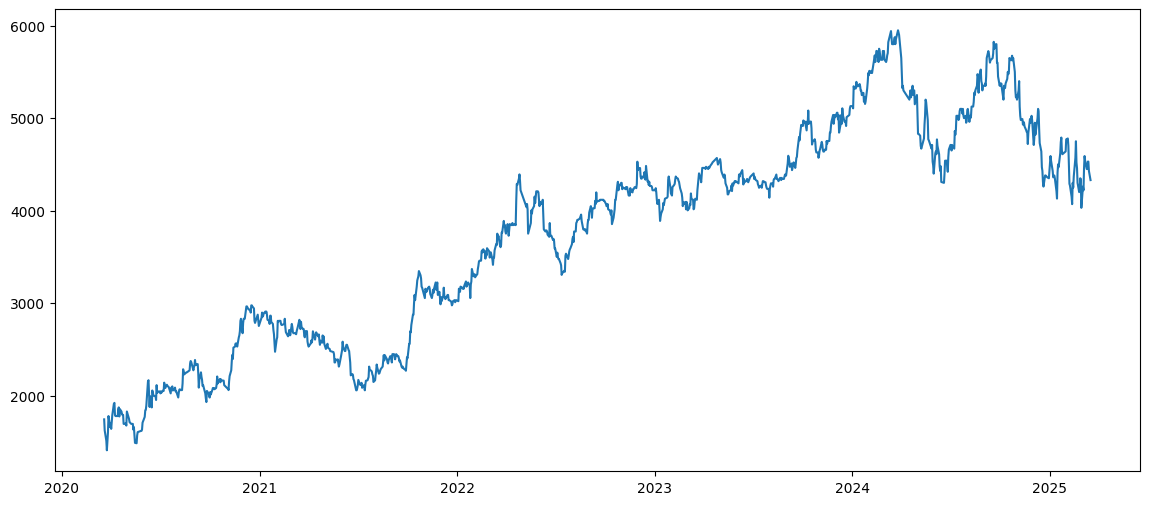

In [10]:
# Plot the historical stock prices and predicted future stock prices
plt.figure(figsize=(14, 6))
plt.plot(data.index, data["Close"], label="Historical Stock Price")
plt.plot(pd.date_range(data.index[-1], periods=days_to_predict+1, closed='right'), future_predictions, label="Predicted Future Stock Price", linestyle="--", marker="o")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.title(f"{ticker} Stock Price Prediction")
plt.show()

In [ ]:
# Save the model
model.save("stock_price_prediction_model.h5")
print("Model saved successfully!")

# Load the model
loaded_model = tf.keras.models.load_model("stock_price_prediction_model.h5")
print("Model loaded successfully!")

# Predict future stock prices using the loaded model
future_predictions_loaded_model = predict_future(loaded_model, scaler, last_data_points, days_to_predict)

print(f"Predicted future close prices for {days_to_predict} days using the loaded model:\n{future_predictions_loaded_model}")

# Compute the comparison between the actual and predicted future stock prices using the loaded model
future_data_loaded_model = pd.DataFrame(future_predictions_loaded_model, index=future_dates, columns=["Close"])

plt.figure(figsize=(14, 6))
plt.plot(data.index, data["Close"], color='blue', ls='none', marker='o', markersize=3, label="Actual Stock Price")
plt.plot(data.index[len(y_train) + lookback:], predictions, 'r-', label="Predicted Stock Price")
plt.plot(future_data.index, future_data["Close"], 'g-', label="Future Predicted Stock Price")
plt.plot(future_data_loaded_model.index, future_data_loaded_model["Close"], 'm-', label="Future Predicted Stock Price (Loaded Model)")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [ ]:
actual_future_prices = data["Close"][-days_to_predict:].values
model_accuracy = np.mean(np.abs(future_predictions - actual_future_prices) / actual_future_prices) * 100
print(f"Model accuracy: {model_accuracy:.2f}%")